### **Task 1 (20 points): Advanced Objective Function and Use Case**

### 1.1.
- $\mathbf{X} \in \mathbb{R}^{n \times d}$ is the dataset with n samples and d features
- $\mathbf{y} \in \{0, 1\}^n$ is the vector of binary labels
- w and b are the weight vector and bias

logistic regression model predicts probability of y=1 using:

$
P(y=1 | \mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b) = \frac{1}{1 + e^{-(\mathbf{w}^{T} \mathbf{x} + \mathbf{b})}}
$

likelihood function:

$
L(\mathbf{w}, b) = \prod_{i=1}^n \sigma(\mathbf{w}^T \mathbf{x}_i + b)^{y_i} \cdot \left(1 - \sigma(\mathbf{w}^T \mathbf{x}_i + b)\right)^{1-y_i}
$

take log of the likelihood:

$
\ell(\mathbf{w}, b) = \sum_{i=1}^n \left[ y_i \log \sigma(\mathbf{w}^T \mathbf{x}_i + b) + (1 - y_i) \log (1 - \sigma(\mathbf{w}^T \mathbf{x}_i + b)) \right]
$

to max the likelihood, we take min of the negative log-likelihood:

$
J(\mathbf{w}, b) = -\frac{1}{n} \sum_{i=1}^n \left[ y_i \log \sigma(\mathbf{w}^T \mathbf{x}_i + b) + (1 - y_i) \log (1 - \sigma(\mathbf{w}^T \mathbf{x}_i + b)) \right]
$

#### MAP vs MLE

https://machinelearningmastery.com/maximum-a-posteriori-estimation/

https://leimao.github.io/blog/Maximum-Likelihood-Estimation-VS-Maximum-A-Posteriori-Estimation/

- MLE approximates the parameters by maxing the likelihood function without looking at previous information about the parameters

$
P(\mathbf{w} | \mathbf{X}, \mathbf{y}) \propto P(\mathbf{y} | \mathbf{X}, \mathbf{w}) \cdot P(\mathbf{w})
$

- MAP estimate maxes the posterior probability (combines the likelihood and prior)

### 1.2.
I would like to predict the survivability of passengers on the Titanic based on their ticket information.

Logistic regression is the best choice for this because it is a binary classification problem (survived: 1 or 0). There is also a relationship between features like ticket/age/cabin and survivability. SVMs can also work for this classification but it could be more expensive because of the large dataset.

https://amlbook.com/eChapters.html - Chapter 8

### 1.3.

- For a passenger, features could be:
  - Pclass = 2, Sex = female, Age = 28, SibSp = 0, Parch = 1, Fare = 15.5, Embarked = C
- These features can be numeric (sex: female -> 1, male -> 0) and scaled for the model
- This assumes that there is a linear relationship between features and odds of survival. There is also independence of features and that the data has no missing values (missing values could just be excluded)

### **Task 2 (20 points): Dataset and Advanced EDA**

### 2.1.
Titanic dataset:

https://github.com/datasciencedojo/datasets/blob/master/titanic.csv

### 2.2.

In [16]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)

# first few rows
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# fill missing values
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean()) # fill with mean
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0]) # fill with mode

titanic_cleaned_df = titanic_df.drop(columns=['Name', 'Ticket', 'Cabin'])

# turn to numerical
titanic_cleaned_df['Sex'] = titanic_cleaned_df['Sex'].map({'male': 0, 'female': 1})
titanic_cleaned_df['Embarked'] = titanic_cleaned_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# show first few rows of cleaned data
titanic_cleaned_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
# get VIF for each feature
X = add_constant(titanic_cleaned_df.drop(columns=['Survived']))

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Feature,VIF
0,const,38.084999
1,PassengerId,1.007572
2,Pclass,1.672534
3,Sex,1.111141
4,Age,1.205739
5,SibSp,1.286613
6,Parch,1.323890
7,Fare,1.648801
8,Embarked,1.079669


### 2.3.

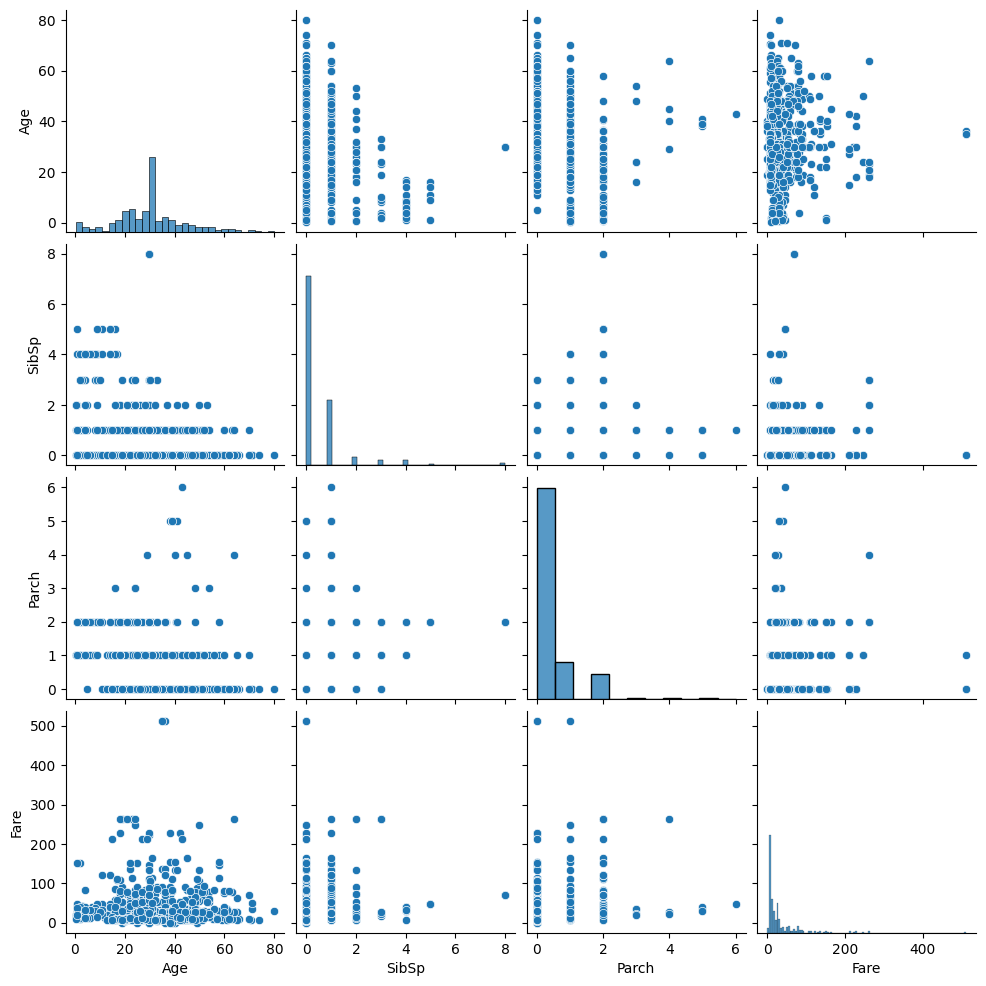

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# columns for the pair plot
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

# pair plot with KDE
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(titanic_cleaned_df[numerical_features])
plt.show()

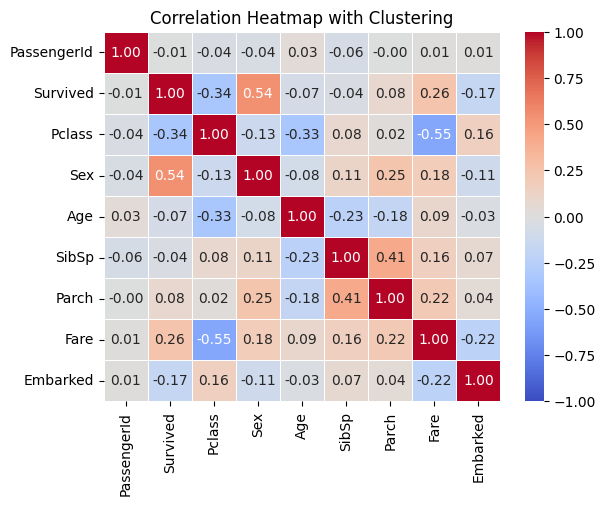

In [5]:
corr_matrix = titanic_cleaned_df.corr()

# heatmap with clustering
# https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Heatmap with Clustering")
plt.show()

### **Task 3 (20 points): Logistic Regression Implementation**

### 3.1.

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
    return cost

def gradient(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    grad = (1 / m) * np.dot(X.T, (h - y))
    return grad

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    cost_history = []

    for _ in range(num_iterations):
        grad = gradient(X, y, theta)
        theta -= learning_rate * grad
        cost_history.append(cost_function(X, y, theta))

    return cost_history

In [7]:
# batch
def batch_gradient_descent(X, y, theta, learning_rate, num_iterations):
    return gradient_descent(X, y, theta, learning_rate, num_iterations)

In [8]:
# stochastic
def stochastic_gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        for i in range(m):
            xi = X[i:i+1, :]
            yi = y[i:i+1]
            grad = gradient(xi, yi, theta)
            theta -= learning_rate * grad
        cost_history.append(cost_function(X, y, theta))

    return cost_history

In [9]:
# mini-batch
def mini_batch_gradient_descent(X, y, theta, learning_rate, num_iterations, batch_size):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        for i in range(0, m, batch_size):
            xi = X[i:i+batch_size, :]
            yi = y[i:i+batch_size]
            grad = gradient(xi, yi, theta)
            theta -= learning_rate * grad
        cost_history.append(cost_function(X, y, theta))

    return cost_history

Final cost (batch): 0.6184672306365887
Final cost (stochastic): 0.6128425032794456
Final cost (mini-batch): 0.6122336571468294


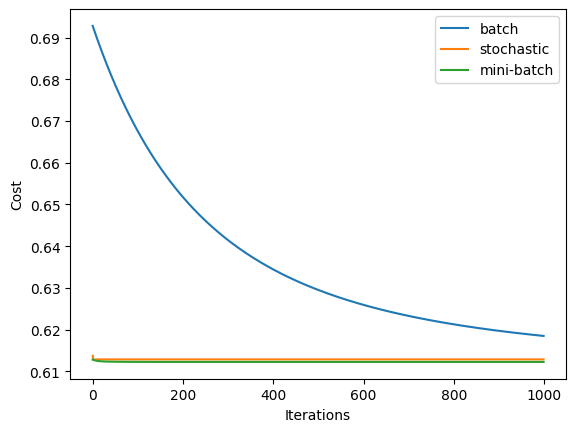

In [15]:
X = titanic_cleaned_df[['Age', 'SibSp', 'Parch', 'Fare']].values
y = titanic_cleaned_df['Survived'].values
X = (X - X.mean(axis=0)) / X.std(axis=0)
X = np.c_[np.ones(X.shape[0]), X]
theta = np.zeros(X.shape[1])
cost_batch = batch_gradient_descent(X, y, theta, 0.01, 1000)
cost_stochastic = stochastic_gradient_descent(X, y, theta, 0.01, 1000)
cost_mini_batch = mini_batch_gradient_descent(X, y, theta, 0.01, 1000, 32)

print("Final cost (batch):", cost_batch[-1])
print("Final cost (stochastic):", cost_stochastic[-1])
print("Final cost (mini-batch):", cost_mini_batch[-1])

plt.plot(cost_batch, label="batch")
plt.plot(cost_stochastic, label="stochastic")
plt.plot(cost_mini_batch, label="mini-batch")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

Batch:
- Uses entire dataset, converges smoothly but expensive for large datasets
- Can descend into local minimum if non-convex

Stochastic:
- Finds gradient one point at a time
- Escapes local minimum, but is less smooth

Mini-Batch:
- "In between" batch and stochastic
- Uses a mini batch of points for faster convergence than batch

### **Task 4 (40 points): Optimization Techniques and Advanced Comparison**

In [12]:
# https://www.kdnuggets.com/2020/05/model-evaluation-metrics-machine-learning.html
# https://medium.com/analytics-vidhya/a-complete-guide-to-adam-and-rmsprop-optimizer-75f4502d83be

# momentum
def momentum(X, y, theta, learning_rate, num_iterations, beta=0.9):
    m = len(y)
    v = np.zeros_like(theta)
    cost_history = []

    for _ in range(num_iterations):
        grad = gradient(X, y, theta)
        v = beta * v + (1 - beta) * grad
        theta -= learning_rate * v
        cost_history.append(cost_function(X, y, theta))

    return theta, cost_history

# RMSProp
def rmsprop(X, y, theta, learning_rate, num_iterations, beta=0.9, epsilon=1e-8):
    m = len(y)
    s = np.zeros_like(theta)
    cost_history = []

    for _ in range(num_iterations):
        grad = gradient(X, y, theta)
        s = beta * s + (1 - beta) * grad**2
        theta -= learning_rate * grad / (np.sqrt(s) + epsilon)
        cost_history.append(cost_function(X, y, theta))

    return theta, cost_history

# Adam
def adam(X, y, theta, learning_rate, num_iterations, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m = len(y)
    m_t = np.zeros_like(theta)
    v_t = np.zeros_like(theta)
    t = 0
    cost_history = []

    for _ in range(num_iterations):
        t += 1
        grad = gradient(X, y, theta)

        m_t = beta1 * m_t + (1 - beta1) * grad
        v_t = beta2 * v_t + (1 - beta2) * grad**2

        m_t_hat = m_t / (1 - beta1**t)
        v_t_hat = v_t / (1 - beta2**t)

        theta -= learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon)
        cost_history.append(cost_function(X, y, theta))

    return theta, cost_history

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(X, y, theta):
    probabilities = sigmoid(np.dot(X, theta))
    predictions = (probabilities >= 0.5).astype(int)

    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    f1 = f1_score(y, predictions)

    return precision, recall, f1

from sklearn.model_selection import ParameterGrid

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'num_iterations': [500, 1000, 2000, 5000]
}

def grid_search_optimizer(X, y, theta, optimizer_func):
    best_score = -float('inf')
    best_params = {}

    for params in ParameterGrid(param_grid):
        learning_rate = params['learning_rate']
        num_iterations = params['num_iterations']

        theta_opt, _ = optimizer_func(X, y, theta, learning_rate, num_iterations)
        precision, recall, f1 = evaluate_model(X, y, theta_opt)

        if f1 > best_score:
            best_score = f1
            best_params = params

    return best_params

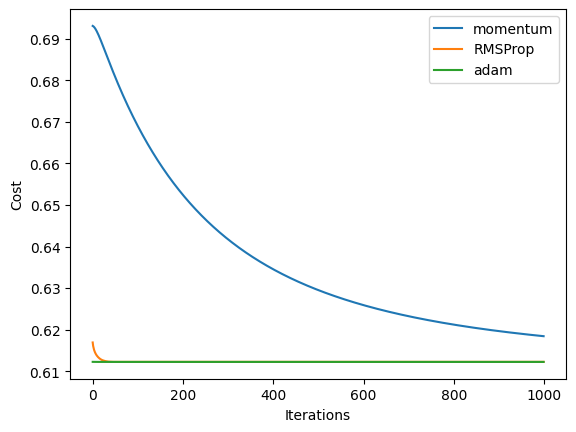

Momentum:
	Precision: 0.7623762376237624 
	Recall: 0.22514619883040934 
	F1 Score: 0.3476297968397291
RMSProp:
	Precision: 0.7388059701492538 
	Recall: 0.2894736842105263 
	F1 Score: 0.41596638655462187
Adam:
	Precision: 0.7481481481481481 
	Recall: 0.2953216374269006 
	F1 Score: 0.42348008385744235
Best parameters for Adam: {'learning_rate': 0.1, 'num_iterations': 500}


In [14]:
theta_initial = np.zeros(X.shape[1])
learning_rate = 0.01
num_iterations = 1000

# test momentum
theta_momentum, cost_momentum = momentum(X, y, theta_initial, learning_rate, num_iterations)
precision_m, recall_m, f1_m = evaluate_model(X, y, theta_momentum)

# test RMSProp
theta_rmsprop, cost_rmsprop = rmsprop(X, y, theta_initial, learning_rate, num_iterations)
precision_r, recall_r, f1_r = evaluate_model(X, y, theta_rmsprop)

# test adam
theta_adam, cost_adam = adam(X, y, theta_initial, learning_rate, num_iterations)
precision_a, recall_a, f1_a = evaluate_model(X, y, theta_adam)

plt.plot(cost_momentum, label="momentum")
plt.plot(cost_rmsprop, label="RMSProp")
plt.plot(cost_adam, label="adam")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

print("Momentum:\n\tPrecision:", precision_m, "\n\tRecall:", recall_m, "\n\tF1 Score:", f1_m)
print("RMSProp:\n\tPrecision:", precision_r, "\n\tRecall:", recall_r, "\n\tF1 Score:", f1_r)
print("Adam:\n\tPrecision:", precision_a, "\n\tRecall:", recall_a, "\n\tF1 Score:", f1_a)

print("Best parameters for Adam:", grid_search_optimizer(X, y, theta_initial, adam))

### Tradeoffs

- momentum is best for smaller problems but the gradients oscellate a lot
- RMSProp is best for gradients with a lot of noise
- adam is best for large/complex datasets, also used a lot in deep learning